In [49]:
import pandas as pd
import seaborn
import numpy as np

In [2]:
%matplotlib inline

In [3]:
checkin = pd.read_csv('data/csv/yelp_academic_dataset_checkin.csv')
business = pd.read_csv('data/csv/yelp_academic_dataset_business.csv')
tip = pd.read_csv('data/csv/yelp_academic_dataset_tip.csv')
users = pd.read_csv('data/csv/yelp_academic_dataset_user.csv')
review = pd.read_csv('data/csv/yelp_academic_dataset_review.csv')

/Users/seanwade/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
az_business = business[business['state'] == 'AZ']

In [5]:
buisness_list = az_business['business_id'].tolist()

In [34]:
review[review['votes.funny'] > 30]['votes.funny'].plot(kind='hist', bins=50)

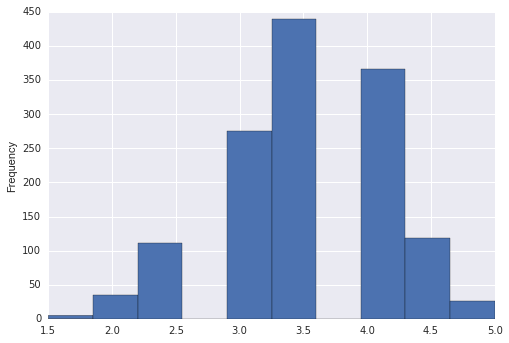

In [45]:
az_business[az_business['attributes.Happy Hour'] == True]['stars'].plot(kind='hist', bins=10)

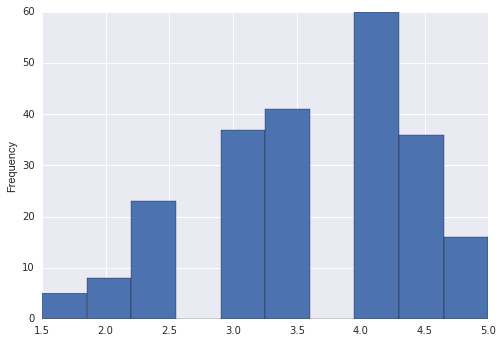

In [46]:
az_business[az_business['attributes.Happy Hour'] == False]['stars'].plot(kind='hist', bins=10)

In [58]:
az_business[az_business['attributes.Happy Hour'].isnull()]['stars'].plot(kind='hist', bins=10)

## Difference between cities

In [77]:
cities = az_business.groupby('city')

In [80]:
cities.get_group('Gilbert')['stars'].value_counts().sort_values().plot(kind='bar')

In [82]:
cities.get_group('Phoenix')['stars'].value_counts().sort_values().plot(kind='bar')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


AttributeError: 'NoneType' object has no attribute 'plot'

In [84]:
bizz_dict = dict(zip(business['business_id'], business['name']))

In [127]:
import plotly.plotly as py
py.sign_in('smwade', "a8zcz2zggpeP7MhyykAS")
from plotly.graph_objs import *

mapbox_access_token = 'pk.eyJ1Ijoic213YWRlIiwiYSI6ImNpdzU4MmR6ZDAwbGwyeHIzcWRkeHNmeWIifQ.dyJ-FEl459ry0ebLOy8f9g'

data = Data([
    Scattermapbox(
        name="Bellow 3",
        lat=az_business[az_business['stars'] <= 3]['latitude'],
        lon=az_business[az_business['stars'] <= 3]['longitude'],
        mode='markers',
        marker=Marker(
            size=5,
            color='red',
            opacity=0.5,
        ),
        text=az_business[az_business['stars'] <= 3]['name'],
        hoverinfo='text',
    ),
        Scattermapbox(
        name="Above 3",
        lat=az_business[az_business['stars'] > 3]['latitude'],
        lon=az_business[az_business['stars'] > 3]['longitude'],
        mode='markers',
        marker=Marker(
            size=5,
            color='blue',
            opacity=0.5,

        ),
        text=az_business[az_business['stars'] > 3]['name'],
        hoverinfo='text',

    )
        
])
layout = Layout(
    title="Good vs Bad Reviews",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=33.4484,
            lon=-112.0740
        ),
        pitch=0,
        zoom=13
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox', validate=False)

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~smwade/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


In [139]:
col = list(az_business.columns)

In [137]:
az_business['attributes.Accepts Credit Cards'].fillna(2).astype(int).unique()

array([1, 2, 0])

## Which Attributes are Important

In [202]:
import re
pattern = re.compile('attributes*', re.IGNORECASE)
attribute_list = [x for x in col if pattern.search(x)]

In [203]:
difference_list = []
for attribute in attribute_list:
    group = az_business.groupby(attribute)
    mean = group['stars'].mean()
    try:
        value = -mean[0] + mean[1]
        difference_list.append(value)
    except:
        pass    

In [207]:
name_attribute_list = [re.sub('attributes.', '', x) for x in attribute_list]

In [216]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15

y_pos = np.arange(len(difference_list))
sorted_args = np.argsort(difference_list)

difference_list = np.array(difference_list)


name_attribute_list = np.array(name_attribute_list)
plt.barh(y_pos, difference_list[sorted_args])
plt.yticks(y_pos, name_attribute_list[sorted_args])
plt.tight_layout()

In [214]:
re.sub('attributes\.', '', 'attributescat')

'attributescat'

In [212]:
attribute_list

array(['attributes.Ambience.divey',
       'attributes.Dietary Restrictions.vegan', 'attributes.Happy Hour',
       'attributes.Order at Counter',
       'attributes.Hair Types Specialized In.africanamerican',
       'attributes.Hair Types Specialized In.kids', 'attributes.BYOB',
       'attributes.Good For.latenight', 'attributes.Outdoor Seating',
       'attributes.Alcohol', 'attributes.Ambience.classy',
       'attributes.By Appointment Only', 'attributes.Parking.lot',
       'attributes.Ambience.touristy', 'attributes.Corkage',
       'attributes.Good For.brunch', 'attributes.Waiter Service',
       'attributes.Parking.street', 'attributes.Ambience.hipster',
       'attributes.BYOB/Corkage',
       'attributes.Hair Types Specialized In.straightperms',
       'attributes.Music.live',
       'attributes.Dietary Restrictions.dairy-free',
       'attributes.Music.background_music', 'attributes.Price Range',
       'attributes.Good For.breakfast', 'attributes.Parking.garage',
       'at